<a href="https://colab.research.google.com/github/pennyorengo/Python-Matplotlib/blob/main/Visualizing_data_with_Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import 
import pandas as pd

# Load data from a text file
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/grades.csv
df_students = pd.read_csv('grades.csv',delimiter=',',header='infer')

# Remove any rows with missing data
df_students = df_students.dropna(axis=0, how='any')

# Calculate who passed, assuming '60' is the grade needed to pass
passes  = pd.Series(df_students['Grade'] >= 60)

# Save who passed to the Pandas dataframe
df_students = pd.concat([df_students, passes.rename("Pass")], axis=1)


# Print the result out into this notebook
df_students 

--2022-11-27 08:45:18--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/grades.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322 [text/plain]
Saving to: ‘grades.csv.8’

grades.csv.8        100%[===================>]     322  --.-KB/s    in 0s      

2022-11-27 08:45:18 (17.4 MB/s) - ‘grades.csv.8’ saved [322/322]



ParserError: ignored

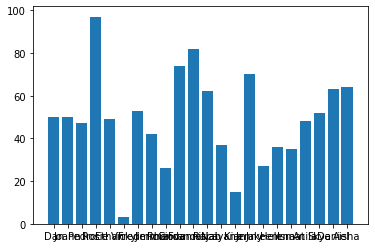

In [ ]:
# Ensure plots are displayed inline in the notebook
%matplotlib inline

from matplotlib import pyplot as plt

# Create a bar plot of name vs grade
plt.bar(x=df_students.Name, height=df_students.Grade)

# Display the plot
plt.show()

Well, that worked; but the chart could use some improvements to make it clearer what we're looking at.

Note that you used the pyplot class from Matplotlib to plot the chart. This class provides a whole bunch of ways to improve the visual elements of the plot. For example, the following code:

Specifies the color of the bar chart.

Adds a title to the chart (so we know what it represents)

Adds labels to the X and Y (so we know which axis shows which data)

Adds a grid (to make it easier to determine the values for the bars)

Rotates the X markers (so we can read them)

In [1]:
# Create a bar plot of name vs grade
plt.bar(x=df_students.Name, height=df_students.Grade, color='orange')

# Customize the chart
plt.title('Student Grades')
plt.xlabel('Student')
plt.ylabel('Grade')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(rotation=90)

# Display the plot
plt.show()

NameError: ignored